In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import cv2
import pandas as pd
from skimage.color import rgb2gray
from PIL import Image
from sklearn.cluster import KMeans

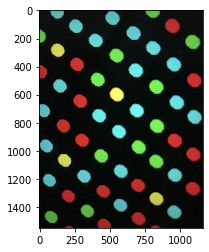

In [2]:
img_path = '/Users/hassaanmuzammil/Desktop/GBMC/ccp2.png'
img = plt.imread(img_path)[:,:,:3]
plt.imshow(img)
plt.show()

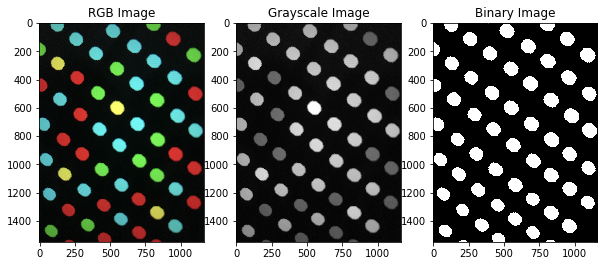

In [3]:
def read_display(img_path, img=None):
    """
    Input: 
          Image path (str)
    Output:
          Displays RGB, grayscale, and binary image
    Returns:
          RGB, grayscale, binary (n-d numpy arrays)
    
    """
    # read rgb image
    if img == None: 
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    else:
        pass
       
    # Convert to grayscale
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Convert to binary
    img_bin = (img_gray > 50).astype('uint8')

    # display rgb, grayscale and binary image
    plt.figure(figsize=(10,20))
    plt.subplot(1,3,1)
    plt.imshow(img)
    plt.title('RGB Image')
    plt.subplot(1,3,2)
    plt.imshow(img_gray, cmap='gray')
    plt.title('Grayscale Image')
    plt.subplot(1,3,3)
    plt.imshow(img_bin, cmap='gray')
    plt.title('Binary Image')
    plt.show()
    
    return img, img_gray, img_bin

img, img_gray, img_bin = read_display(img_path)


In [4]:
def r_shift(s, i):
    if i == 0:
        return s
    return s[-i:] + s[0:len(s)-i]  

In [5]:
red = np.array([255,0,0])
blue = np.array([0,255,255])
green = np.array([127,255,0])
yellow = np.array([255,255,0])
black = np.array([0,0,0])

colors = np.stack((red,yellow,green,blue,black))
color_dict = {0:'R',1:'Y',2:'G',3:'B',4:'Bl'}

def identify_color(rgb_val):
    c_list = []
    for i in colors:
        c_list.append(np.sum((i-rgb_val)**2))
    
    return color_dict[c_list.index(min(c_list))]

In [6]:
def get_centroids(img, img_bin):
    """
    Input: 
          RGB 3-d numpy array, binary 2-d numpy array
    Output:
          None
    Returns:
          centroids of independent components (tuple) and their colors (char) 
          return type dict >> {centroids:'color'}
    """    
    num_labels, labels = cv2.connectedComponents(img_bin)
    centroids = {}
        
    for i in range(num_labels):
    
        # get x,y center coordinate of label
        x = np.int(np.mean(np.where(labels==i)[0]))
        y = np.int(np.mean(np.where(labels==i)[1]))
        
        # identify color of x,y coordinate
        c = identify_color(img[x,y])
        
        # add pair {center:color} to dictionary circles 
        if c != 'Bl':
            centroids[(x,y)] = c
        
    return centroids

In [7]:
centroid_colors = get_centroids(img, img_bin)
centroid_colors

{(26, 129): 'B',
 (0, 383): 'R',
 (24, 806): 'G',
 (55, 520): 'B',
 (112, 944): 'R',
 (113, 261): 'B',
 (163, 670): 'B',
 (186, 20): 'G',
 (215, 401): 'B',
 (226, 1089): 'G',
 (268, 809): 'B',
 (284, 131): 'Y',
 (322, 549): 'G',
 (385, 955): 'B',
 (385, 269): 'R',
 (427, 686): 'B',
 (440, 24): 'R',
 (493, 415): 'G',
 (498, 1100): 'R',
 (538, 147): 'B',
 (544, 831): 'G',
 (599, 550): 'Y',
 (646, 291): 'R',
 (656, 976): 'B',
 (713, 692): 'B',
 (715, 35): 'B',
 (749, 426): 'B',
 (759, 1102): 'B',
 (823, 836): 'G',
 (821, 172): 'R',
 (863, 565): 'B',
 (924, 304): 'R',
 (926, 961): 'R',
 (964, 51): 'B',
 (973, 706): 'G',
 (1024, 1093): 'R',
 (1035, 440): 'G',
 (1067, 180): 'Y',
 (1075, 831): 'G',
 (1145, 579): 'B',
 (1172, 962): 'B',
 (1180, 318): 'B',
 (1209, 72): 'B',
 (1244, 701): 'R',
 (1267, 1090): 'R',
 (1287, 455): 'R',
 (1320, 208): 'R',
 (1340, 831): 'Y',
 (1385, 576): 'B',
 (1427, 342): 'G',
 (1434, 959): 'B',
 (1469, 86): 'G',
 (1480, 704): 'R',
 (1518, 460): 'R',
 (1540, 825): '

In [8]:
from heapq import nsmallest
def nearest_8(points):
    """
    Input:
          type: dict
          {(centroids):'color'}
          centroids of independent components (tuple) and their colors (char)
    Output:
          None
    Returns:
          type: dict
          {(centroids): {nearest_8:distance}}
          centroids of independent components (tuple) and their nearest 8 neighbors with distances
    """ 
    my_list = {}
    for i in range(len(points)):
        lst = {}
        for j in range(len(points)):
            if i != j:
                x1,y1 = points[i]
                x2,y2 = points[j]
                sum_ = (x1-x2)**2 + (y1-y2)**2
                lst[points[j]] = sum_
        #print(lst)
        
        new_lst = {}
        vals = nsmallest(8,list(lst.values()))
        #print(vals)
        
        for key,val in lst.items():
            #print(val)
            if val in vals:
                new_lst[key] = val
        #print(new_lst)
        
        my_list[points[i]] = new_lst
    return my_list

k = nearest_8(list(centroid_colors.keys()))

In [9]:
k

{(26, 129): {(0, 383): 65192,
  (55, 520): 153722,
  (113, 261): 24993,
  (186, 20): 37481,
  (215, 401): 109705,
  (284, 131): 66568,
  (385, 269): 148481,
  (440, 24): 182421},
 (0, 383): {(26, 129): 65192,
  (55, 520): 21794,
  (113, 261): 27653,
  (163, 670): 108938,
  (215, 401): 46549,
  (284, 131): 144160,
  (322, 549): 131240,
  (385, 269): 161221},
 (24, 806): {(55, 520): 82757,
  (112, 944): 26788,
  (163, 670): 37817,
  (226, 1089): 120893,
  (268, 809): 59545,
  (322, 549): 154853,
  (385, 955): 152522,
  (427, 686): 176809},
 (55, 520): {(26, 129): 153722,
  (0, 383): 21794,
  (24, 806): 82757,
  (113, 261): 70445,
  (163, 670): 34164,
  (215, 401): 39761,
  (268, 809): 128890,
  (322, 549): 72130},
 (112, 944): {(24, 806): 26788,
  (55, 520): 183025,
  (163, 670): 77677,
  (226, 1089): 34021,
  (268, 809): 42561,
  (385, 955): 74650,
  (427, 686): 165789,
  (498, 1100): 173332},
 (113, 261): {(26, 129): 24993,
  (0, 383): 27653,
  (55, 520): 70445,
  (186, 20): 63410,
  (

In [10]:
def orient_pattern(k, centroid_colors, th=20):
    """
    Input:
          type: dict
          {(centroids): {nearest_8:distance}}
          centroids of independent components (tuple) and their nearest 8 neighbors with distances
    Returns:
          type: dict
          {(centroids): 'pattern'}
          centroids of independent components (tuple) and clockwise pattern of 8 outer components (string)
    """ 
    pattern_dict = {}
    for p,d in k.items():
        vals = list(d.keys())
        final_lst = []
        top = []
        right = []
        bottom = []
        left = []
        #print(vals)
        p1,p2 = p
        for x,y in vals:
            t = (x,y)
            #print(t)
            if x > p1 + th:
                right.append(t)
            if x < p1 - th:
                left.append(t)
            if y < p2 - th:
                top.append(t)
            if y > p2 + th:
                bottom.append(t)

            top    = sorted(top,    key=lambda k:k[0], reverse=False)
            right  = sorted(right,  key=lambda k:k[1], reverse=False)
            bottom = sorted(bottom, key=lambda k:k[0], reverse=True)
            left   = sorted(left,   key=lambda k:k[1], reverse=True)
        '''
        print(top)   
        print(right)
        print(bottom)
        print(left)
        '''

        for i in top:
            final_lst.append(i)
        for i in right:
            if i not in final_lst:
                final_lst.append(i)
        for i in bottom:
            if i not in final_lst:
                final_lst.append(i)
        for i in left:
            if i not in final_lst:
                final_lst.append(i)

        
        pattern = []
        for coord in final_lst:
            pattern.append(centroid_colors[coord])

        pattern_dict[p] = centroid_colors[p] + ''.join(pattern)
    return pattern_dict

### TEST CASE 1

In [11]:
k1 = {(1145,579):
 {(863, 565): 79720,
 (973, 706): 45713,
 (1035, 440): 31421,
 (1075, 831): 68404,
 (1180, 318): 69346,
 (1244, 701): 24685,
 (1287, 455): 35540,
 (1385, 576): 57609}}
k1

{(1145, 579): {(863, 565): 79720,
  (973, 706): 45713,
  (1035, 440): 31421,
  (1075, 831): 68404,
  (1180, 318): 69346,
  (1244, 701): 24685,
  (1287, 455): 35540,
  (1385, 576): 57609}}

In [12]:
orient_pattern(k1, centroid_colors)

{(1145, 579): 'BGBRBRGGB'}

### TEST CASE 2

In [13]:
p = (322,549)
d = k[p]
orient_pattern({p:d}, centroid_colors)

{(322, 549): 'GBBRGYBBB'}

### TEST CASE 3

In [14]:
all_patterns = orient_pattern(k, centroid_colors)
all_patterns

{(26, 129): 'BGRYBRBBR',
 (0, 383): 'RBBYRBBGB',
 (24, 806): 'GBBGBBRBG',
 (55, 520): 'BRBBBGBBG',
 (112, 944): 'RGBBBBBGR',
 (113, 261): 'BBGYRBGBR',
 (163, 670): 'BRBBGBBRG',
 (186, 20): 'GRYBRBBBR',
 (215, 401): 'BBYRGGBBR',
 (226, 1089): 'GGRBBBGBR',
 (268, 809): 'BBGBGBGRG',
 (284, 131): 'YGRBRGBBB',
 (322, 549): 'GBBRGYBBB',
 (385, 955): 'BBBBGBRGR',
 (385, 269): 'RYRBRGGBB',
 (427, 686): 'BGGYBGBBB',
 (440, 24): 'RBBRGRYBG',
 (493, 415): 'GRBRBYBGB',
 (498, 1100): 'RRBBGBGBG',
 (538, 147): 'BRBRRBGRY',
 (544, 831): 'GBBYBGBRB',
 (599, 550): 'YGRBBBGBG',
 (646, 291): 'RRBBRRBYG',
 (656, 976): 'BBBGBGRBR',
 (713, 692): 'BYBBGGBGB',
 (715, 35): 'BBRYRBRBR',
 (749, 426): 'BRRRGBBYG',
 (759, 1102): 'BBGBBGRRR',
 (823, 836): 'GBBGGRBBG',
 (821, 172): 'RBBBYRGBR',
 (863, 565): 'BBRGBGGBY',
 (924, 304): 'RRBYBGBBR',
 (926, 961): 'RBGGGBRBB',
 (964, 51): 'BBYRBGRRB',
 (973, 706): 'GBGBRGRGB',
 (1024, 1093): 'RBGRGGBRB',
 (1035, 440): 'GRYBRBGBB',
 (1067, 180): 'YBBRBRGRR',
 (1075, 831): 

In [15]:
color_dict2 = {'R':0,'Y':1,'G':2,'B':3}
def generate_codes(all_patterns):
    '''
    Input: 
         {(centroids): 'pattern'}
    Output:
         {(centroids): 'coded-pattern'}
    
    '''
    code_dict = {}
    for key,val in all_patterns.items():
        for v in val:
            val = val.replace(v,str(color_dict2[v]))
        code_dict[key] = val
    return code_dict

In [16]:
code_dict_1 = generate_codes(all_patterns)
code_dict_1 

{(26, 129): '320130330',
 (0, 383): '033103323',
 (24, 806): '233233032',
 (55, 520): '303332332',
 (112, 944): '023333320',
 (113, 261): '332103230',
 (163, 670): '303323302',
 (186, 20): '201303330',
 (215, 401): '331022330',
 (226, 1089): '220333230',
 (268, 809): '332323202',
 (284, 131): '120302333',
 (322, 549): '233021333',
 (385, 955): '333323020',
 (385, 269): '010302233',
 (427, 686): '322132333',
 (440, 24): '033020132',
 (493, 415): '203031323',
 (498, 1100): '003323232',
 (538, 147): '303003201',
 (544, 831): '233132303',
 (599, 550): '120333232',
 (646, 291): '003300312',
 (656, 976): '333232030',
 (713, 692): '313322323',
 (715, 35): '330103030',
 (749, 426): '300023312',
 (759, 1102): '332332000',
 (823, 836): '233220332',
 (821, 172): '033310230',
 (863, 565): '330232231',
 (924, 304): '003132330',
 (926, 961): '032223033',
 (964, 51): '331032003',
 (973, 706): '232302023',
 (1024, 1093): '032022303',
 (1035, 440): '201303233',
 (1067, 180): '133030200',
 (1075, 831): 

In [17]:
def get_coded_patterns(img_path):
    # read, display and store image
    img, img_gray, img_bin = read_display(img_path)
    # apply connected components, get centroids of labels and identify their colors
    centroid_colors = get_centroids(img, img_bin)
    # get nearest 8 neighbors for all centroids
    neighbors_dict = nearest_8(list(centroid_colors.keys()))
    # orient nearest 8 neighbors to form 3x3 color patterns
    pattern_dict = orient_pattern(neighbors_dict, centroid_colors)
    # replace color pattern with coded pattern
    coded_dict = generate_codes(pattern_dict)
    
    return centroid_colors, neighbors_dict, pattern_dict, coded_dict

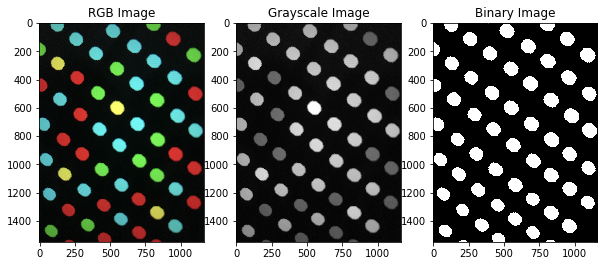

In [18]:
img_path_1 = '/Users/hassaanmuzammil/Desktop/GBMC/ccp2.png'
c1,n1,p1,cd1 = get_coded_patterns(img_path_1)


In [19]:
#c1,n1,p1,cd1
p1

{(26, 129): 'BGRYBRBBR',
 (0, 383): 'RBBYRBBGB',
 (24, 806): 'GBBGBBRBG',
 (55, 520): 'BRBBBGBBG',
 (112, 944): 'RGBBBBBGR',
 (113, 261): 'BBGYRBGBR',
 (163, 670): 'BRBBGBBRG',
 (186, 20): 'GRYBRBBBR',
 (215, 401): 'BBYRGGBBR',
 (226, 1089): 'GGRBBBGBR',
 (268, 809): 'BBGBGBGRG',
 (284, 131): 'YGRBRGBBB',
 (322, 549): 'GBBRGYBBB',
 (385, 955): 'BBBBGBRGR',
 (385, 269): 'RYRBRGGBB',
 (427, 686): 'BGGYBGBBB',
 (440, 24): 'RBBRGRYBG',
 (493, 415): 'GRBRBYBGB',
 (498, 1100): 'RRBBGBGBG',
 (538, 147): 'BRBRRBGRY',
 (544, 831): 'GBBYBGBRB',
 (599, 550): 'YGRBBBGBG',
 (646, 291): 'RRBBRRBYG',
 (656, 976): 'BBBGBGRBR',
 (713, 692): 'BYBBGGBGB',
 (715, 35): 'BBRYRBRBR',
 (749, 426): 'BRRRGBBYG',
 (759, 1102): 'BBGBBGRRR',
 (823, 836): 'GBBGGRBBG',
 (821, 172): 'RBBBYRGBR',
 (863, 565): 'BBRGBGGBY',
 (924, 304): 'RRBYBGBBR',
 (926, 961): 'RBGGGBRBB',
 (964, 51): 'BBYRBGRRB',
 (973, 706): 'GBGBRGRGB',
 (1024, 1093): 'RBGRGGBRB',
 (1035, 440): 'GRYBRBGBB',
 (1067, 180): 'YBBRBRGRR',
 (1075, 831): 

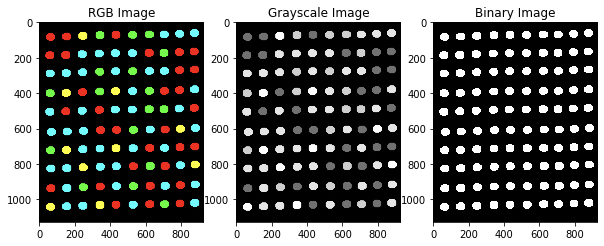

In [20]:
img_path_2 = '/Users/hassaanmuzammil/Desktop/GBMC/Color-coded-pattern.png'
c2,n2,p2,cd2 = get_coded_patterns(img_path_2)

In [21]:
#c2,n2,p2,cd2
p2

{(61, 874): 'BBGBRGRRR',
 (65, 790): 'BGBRGRRRB',
 (69, 620): 'GRGBRGRBB',
 (69, 704): 'BGGRGRRBB',
 (71, 432): 'RGYBBBBGG',
 (71, 526): 'GRGBBRGGB',
 (73, 342): 'GYRBBGBRG',
 (77, 246): 'YRRRBBBGR',
 (81, 154): 'RRRRBBBYG',
 (83, 64): 'RRBRBBBRY',
 (165, 872): 'RBBRGRBRB',
 (169, 788): 'RBGBRRRBB',
 (173, 618): 'RGBGBBGBG',
 (173, 702): 'GGRBBRRBB',
 (175, 428): 'BGBGBGBGR',
 (175, 524): 'BRBBGBRGG',
 (177, 338): 'BYBBGBBRG',
 (181, 242): 'BRRBBGBGY',
 (185, 150): 'RRRBBBBYR',
 (187, 60): 'RBGBBRBRR',
 (267, 874): 'RRGRBRBBR',
 (271, 790): 'RGBRRBRRR',
 (275, 620): 'BBGBGRBGR',
 (275, 704): 'BRBGRRRRG',
 (277, 430): 'BBGGYBGBB',
 (277, 526): 'GBBYBGBRB',
 (279, 340): 'GBBRGYBBB',
 (283, 244): 'BRBYRGGBB',
 (287, 152): 'BRBGYRBBR',
 (289, 62): 'BGYBBRBRR',
 (379, 874): 'BRBRRBGRR',
 (383, 790): 'RBRGBRBRR',
 (387, 620): 'GGBBGGRBB',
 (387, 704): 'RBGGGBRRB',
 (389, 430): 'YGGRBBBGB',
 (389, 526): 'BBYBBGGBG',
 (391, 340): 'GBRBRBYBG',
 (395, 244): 'RBYRBRGGB',
 (399, 152): 'YBGBRBRBB',

In [22]:
def get_key(val, my_dict):
    for key, value in my_dict.items():
         if val == value:
             return key

def get_rotated_codes(code_dict):
    cd = code_dict.copy()
    for key,value in cd.items():
        p2 = []
        for j in range(8):
            p2.append(value[0]+r_shift(value[1:],j))
            cd[key] = p2
    
    return cd

In [23]:
def same_points(code_dict1, code_dict2):
    same_patterns = []
    cd1 = get_rotated_codes(code_dict1)
    cd2 = get_rotated_codes(code_dict2)
    
    for key,val in cd1.items():
        cd1[key] = sorted(val)
    for key,val in cd2.items():
        cd2[key] = sorted(val)  
        
    same_patterns = [lst for lst in cd1.values() if lst in cd2.values()]
    print('No. of same 3x3 patterns detected: ',len(same_patterns))
    
    lst1,lst2 = ([],[])
    for val in same_patterns:
        p1 = get_key(val, cd1)
        p2 = get_key(val, cd2)
        lst1.append(p1)
        lst2.append(p2)
        print('Pattern: ',val[0])
        print('Found at ',p1,' in image 1')
        print('Found at ',p2,' in image 2')
   
    return lst1,lst2

In [24]:
lst1, lst2 = same_points(cd1,cd2)

No. of same 3x3 patterns detected:  22
Pattern:  302233031
Found at  (215, 401)  in image 1
Found at  (283, 244)  in image 2
Pattern:  302323232
Found at  (268, 809)  in image 1
Found at  (175, 428)  in image 2
Pattern:  202133333
Found at  (322, 549)  in image 1
Found at  (279, 340)  in image 2
Pattern:  002233103
Found at  (385, 269)  in image 1
Found at  (395, 244)  in image 2
Pattern:  313233322
Found at  (427, 686)  in image 1
Found at  (277, 430)  in image 2
Pattern:  203031323
Found at  (493, 415)  in image 1
Found at  (391, 340)  in image 2
Pattern:  203331323
Found at  (544, 831)  in image 1
Found at  (277, 526)  in image 2
Pattern:  103332322
Found at  (599, 550)  in image 1
Found at  (389, 430)  in image 2
Pattern:  000312033
Found at  (646, 291)  in image 1
Found at  (495, 338)  in image 2
Pattern:  313322323
Found at  (713, 692)  in image 1
Found at  (389, 526)  in image 2
Pattern:  300023312
Found at  (749, 426)  in image 1
Found at  (493, 428)  in image 2
Pattern:  20332

In [25]:
from matplotlib.patches import ConnectionPatch

def draw_connections(path1,path2,lst1,lst2):

    img1 = Image.open(path1)
    img2 = Image.open(path2)

    fig = plt.figure(figsize=(20,20))

    ax1 = fig.add_subplot(1,2,1)
    ax1.imshow(img1)

    ax2 = fig.add_subplot(1,2,2)
    ax2.imshow(img2)


    # Draw an arrow between the same point in data coordinates,
    # but in different axes.

    for i in range(len(lst1)):
        xy = [lst1[i][1],lst1[i][0]]
        x2y2 = [lst2[i][1],lst2[i][0]]
        con = ConnectionPatch(xyA=xy, coordsA=ax1.transData,xyB=x2y2, coordsB=ax2.transData,arrowstyle="<->", shrinkB=5)
        con.set_color('c')
        con.set_linewidth(5)
        fig.add_artist(con)

    plt.show()

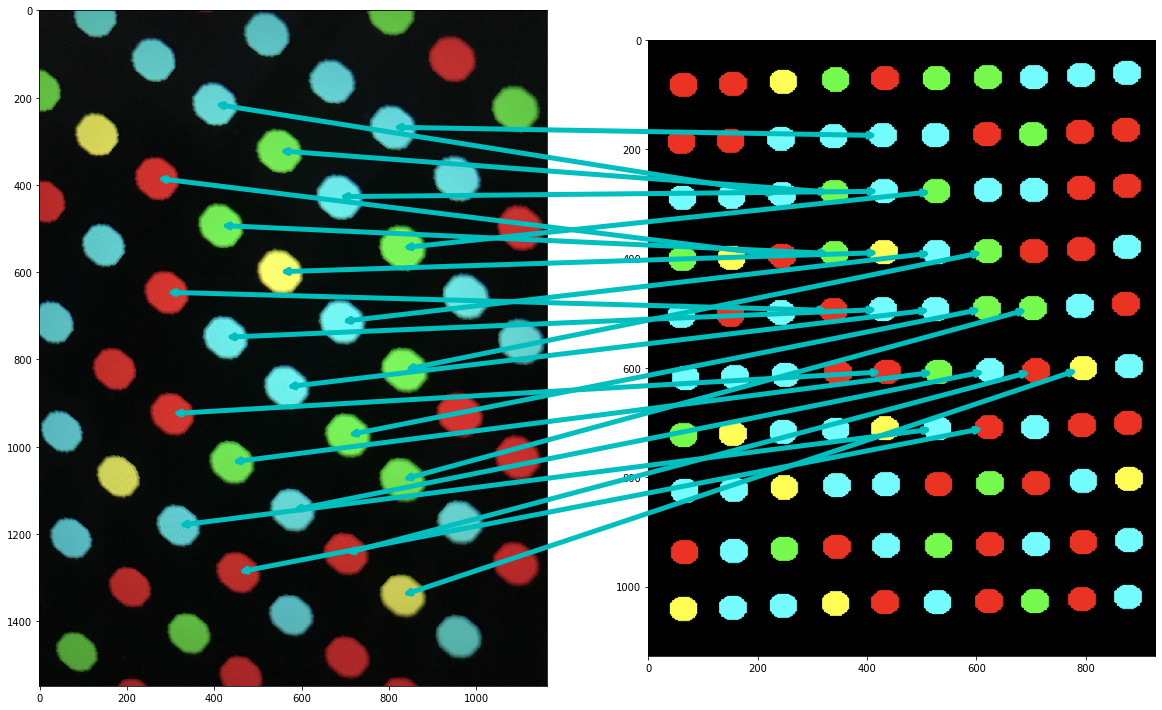

In [26]:
draw_connections(img_path_1,img_path_2,lst1,lst2)

In [27]:
def match_points(img_path_1,img_path_2):
    _,_,_,code_dict_1 = get_coded_patterns(img_path_1)
    _,_,_,code_dict_2 = get_coded_patterns(img_path_2) 
    lst1,lst2 = same_points(code_dict_1,code_dict_2)
    draw_connections(img_path_1, img_path_2, lst1, lst2)
    pass

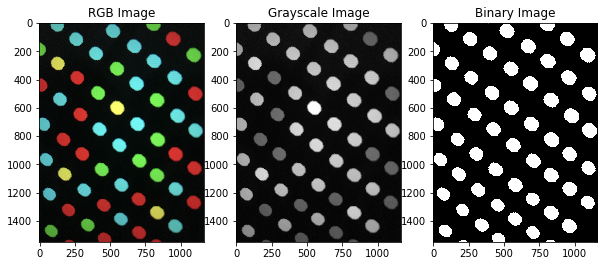

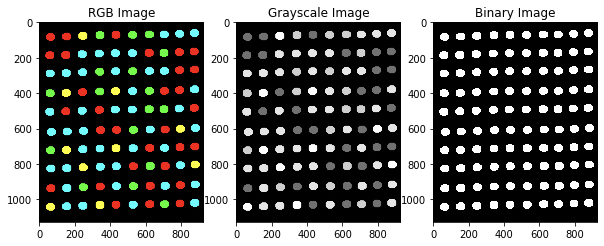

No. of same 3x3 patterns detected:  22
Pattern:  302233031
Found at  (215, 401)  in image 1
Found at  (283, 244)  in image 2
Pattern:  302323232
Found at  (268, 809)  in image 1
Found at  (175, 428)  in image 2
Pattern:  202133333
Found at  (322, 549)  in image 1
Found at  (279, 340)  in image 2
Pattern:  002233103
Found at  (385, 269)  in image 1
Found at  (395, 244)  in image 2
Pattern:  313233322
Found at  (427, 686)  in image 1
Found at  (277, 430)  in image 2
Pattern:  203031323
Found at  (493, 415)  in image 1
Found at  (391, 340)  in image 2
Pattern:  203331323
Found at  (544, 831)  in image 1
Found at  (277, 526)  in image 2
Pattern:  103332322
Found at  (599, 550)  in image 1
Found at  (389, 430)  in image 2
Pattern:  000312033
Found at  (646, 291)  in image 1
Found at  (495, 338)  in image 2
Pattern:  313322323
Found at  (713, 692)  in image 1
Found at  (389, 526)  in image 2
Pattern:  300023312
Found at  (749, 426)  in image 1
Found at  (493, 428)  in image 2
Pattern:  20332

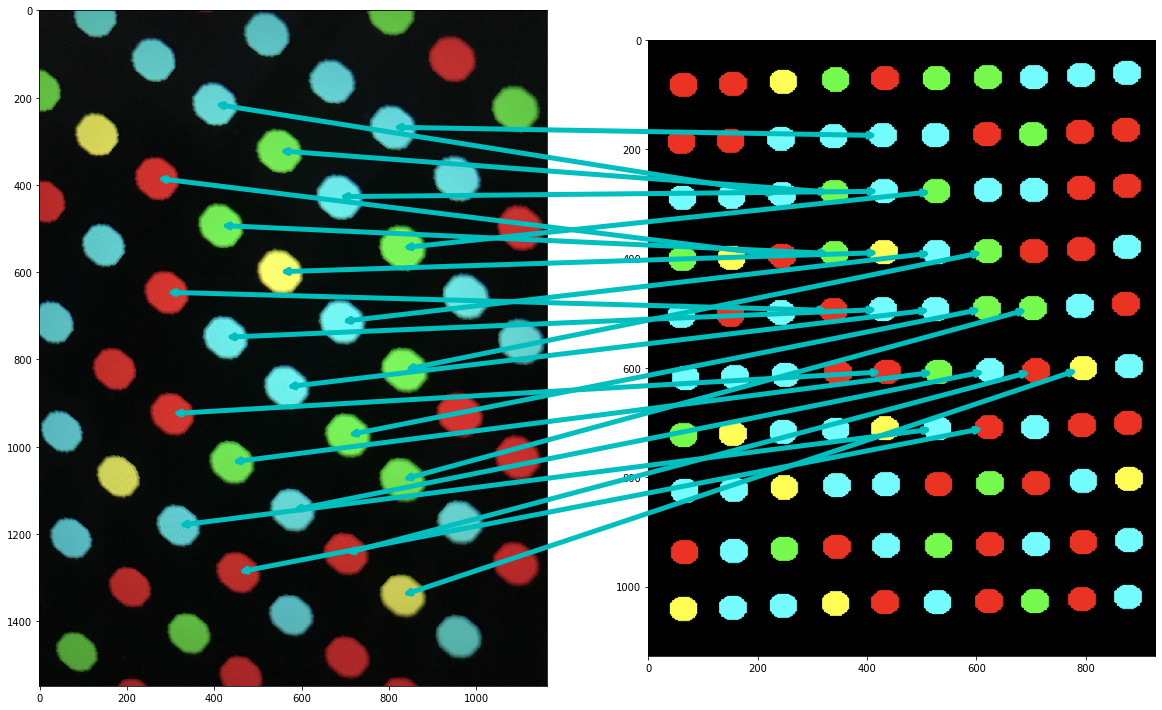

In [28]:
match_points(img_path_1,img_path_2)

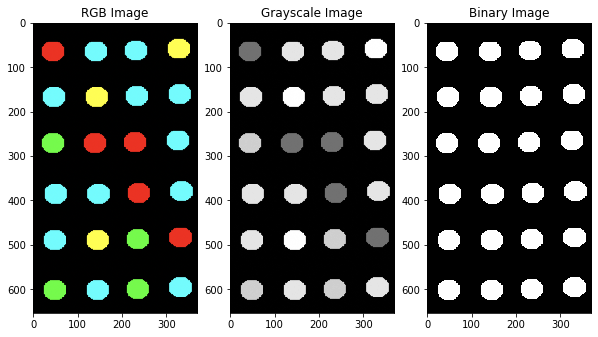

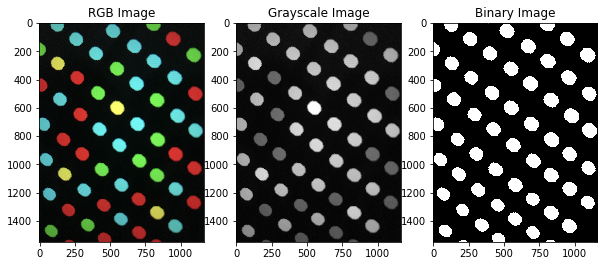

No. of same 3x3 patterns detected:  5
Pattern:  000313233
Found at  (271, 138)  in image 1
Found at  (924, 304)  in image 2
Pattern:  000312033
Found at  (383, 236)  in image 1
Found at  (646, 291)  in image 2
Pattern:  300023312
Found at  (385, 146)  in image 1
Found at  (749, 426)  in image 2
Pattern:  203031323
Found at  (487, 234)  in image 1
Found at  (493, 415)  in image 2
Pattern:  103332322
Found at  (489, 144)  in image 1
Found at  (599, 550)  in image 2


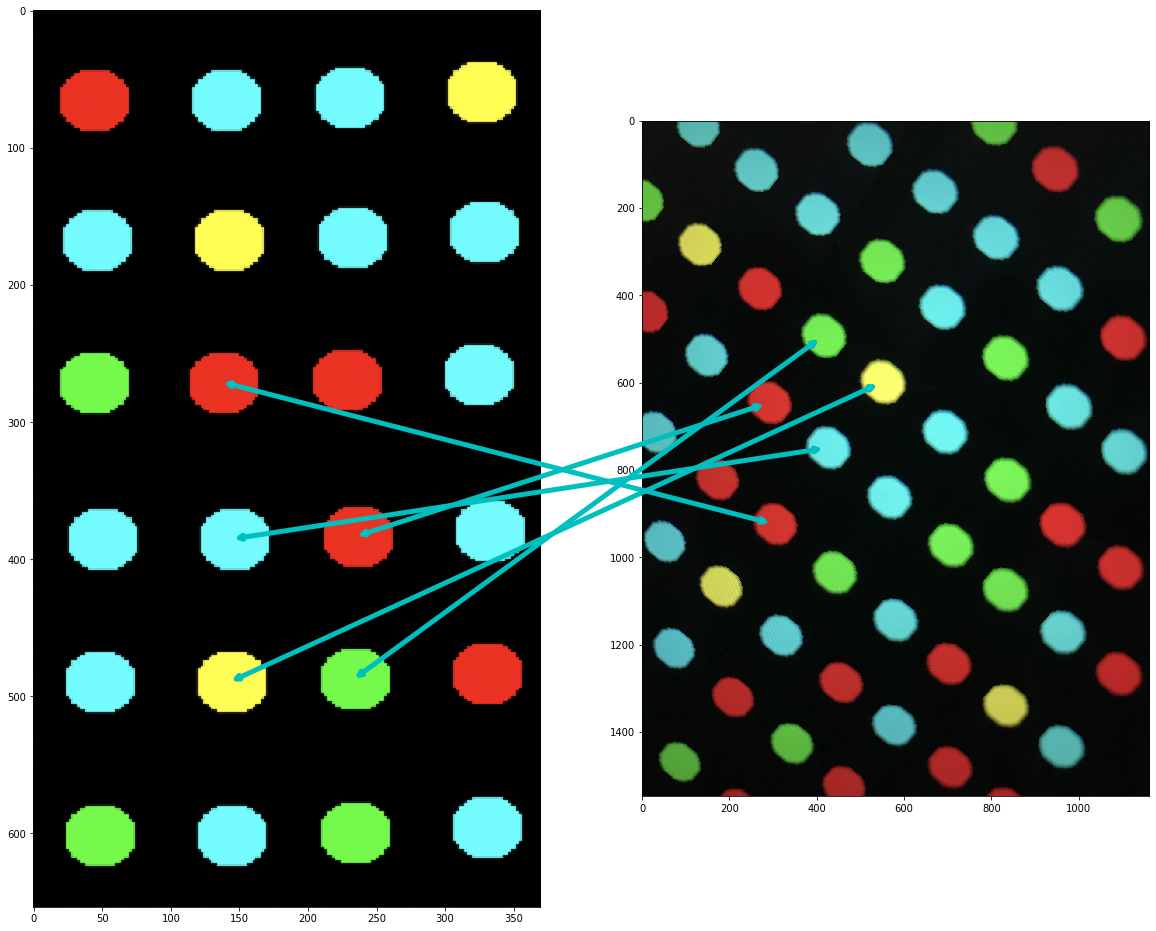

In [29]:
img_path_3 = '/Users/hassaanmuzammil/Desktop/GBMC/(5X5)90.png'
img_path_4 = '/Users/hassaanmuzammil/Desktop/GBMC/(5X5)2.png'
match_points(img_path_3,img_path_1)

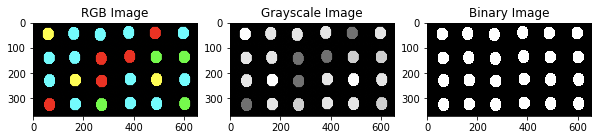

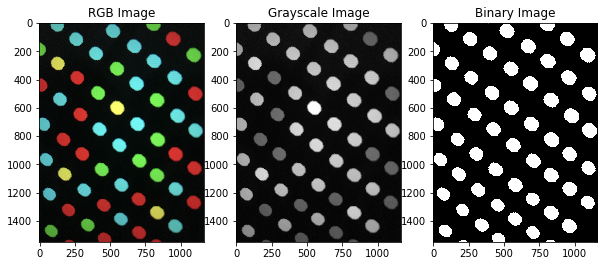

No. of same 3x3 patterns detected:  5
Pattern:  000312033
Found at  (132, 383)  in image 1
Found at  (646, 291)  in image 2
Pattern:  203031323
Found at  (134, 487)  in image 1
Found at  (493, 415)  in image 2
Pattern:  300023312
Found at  (222, 385)  in image 1
Found at  (749, 426)  in image 2
Pattern:  103332322
Found at  (224, 489)  in image 1
Found at  (599, 550)  in image 2
Pattern:  000313233
Found at  (230, 271)  in image 1
Found at  (924, 304)  in image 2


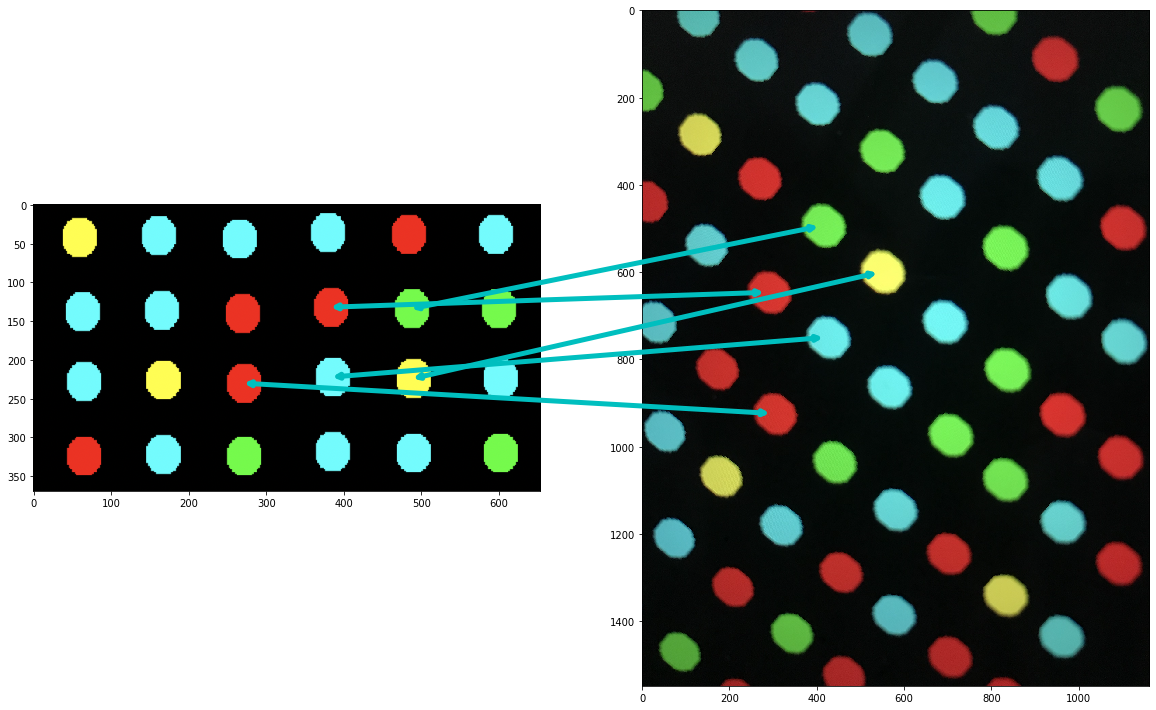

In [70]:
match_points(img_path_4, img_path_1)

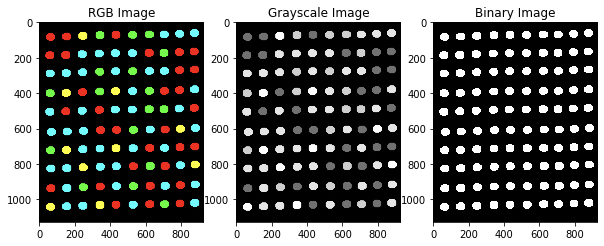

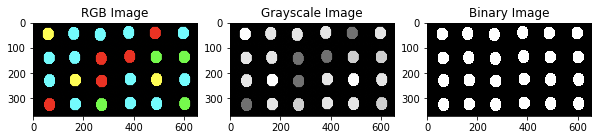

No. of same 3x3 patterns detected:  9
Pattern:  300321033
Found at  (287, 152)  in image 1
Found at  (36, 379)  in image 2
Pattern:  103332322
Found at  (389, 430)  in image 1
Found at  (224, 489)  in image 2
Pattern:  203031323
Found at  (391, 340)  in image 1
Found at  (134, 487)  in image 2
Pattern:  300023312
Found at  (493, 428)  in image 1
Found at  (222, 385)  in image 2
Pattern:  000312033
Found at  (495, 338)  in image 1
Found at  (132, 383)  in image 2
Pattern:  000313233
Found at  (607, 436)  in image 1
Found at  (230, 271)  in image 2
Pattern:  003033331
Found at  (609, 346)  in image 1
Found at  (140, 269)  in image 2
Pattern:  100333032
Found at  (711, 432)  in image 1
Found at  (226, 167)  in image 2
Pattern:  300331331
Found at  (713, 342)  in image 1
Found at  (136, 165)  in image 2


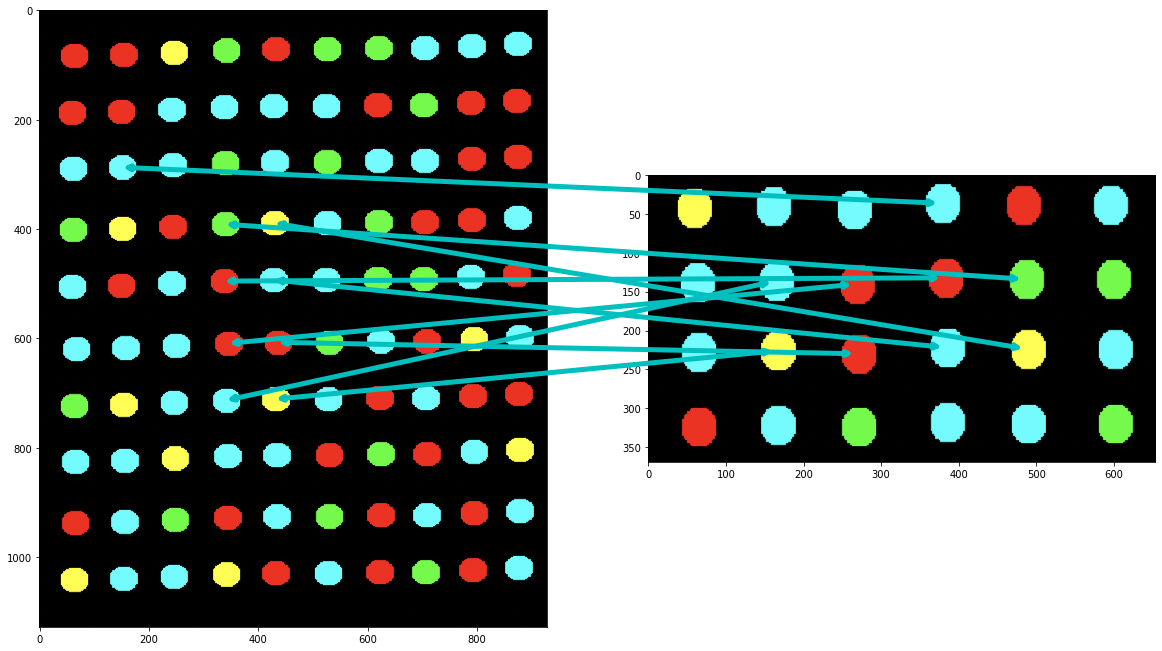

In [30]:
match_points(img_path_2,img_path_4)

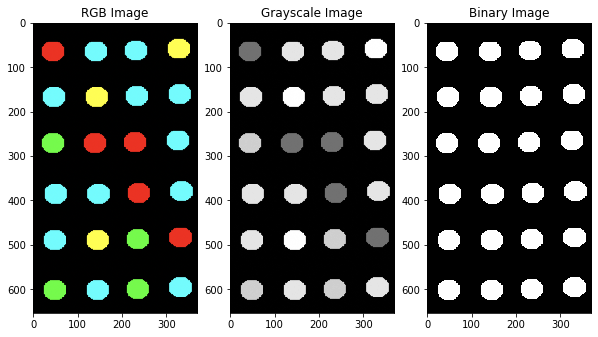

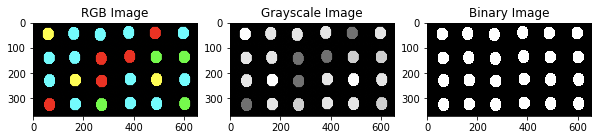

No. of same 3x3 patterns detected:  16
Pattern:  001033323
Found at  (65, 44)  in image 1
Found at  (324, 65)  in image 2
Pattern:  301333103
Found at  (65, 140)  in image 1
Found at  (228, 65)  in image 2
Pattern:  303313331
Found at  (161, 328)  in image 1
Found at  (40, 161)  in image 2
Pattern:  300331331
Found at  (165, 232)  in image 1
Found at  (136, 165)  in image 2
Pattern:  300133302
Found at  (167, 46)  in image 1
Found at  (322, 167)  in image 2
Pattern:  100333032
Found at  (167, 142)  in image 1
Found at  (226, 167)  in image 2
Pattern:  300033131
Found at  (265, 324)  in image 1
Found at  (44, 265)  in image 2
Pattern:  003033331
Found at  (269, 228)  in image 1
Found at  (140, 269)  in image 2
Pattern:  000313233
Found at  (271, 138)  in image 1
Found at  (230, 271)  in image 2
Pattern:  300321033
Found at  (379, 332)  in image 1
Found at  (36, 379)  in image 2
Pattern:  000312033
Found at  (383, 236)  in image 1
Found at  (132, 383)  in image 2
Pattern:  300023123
Foun

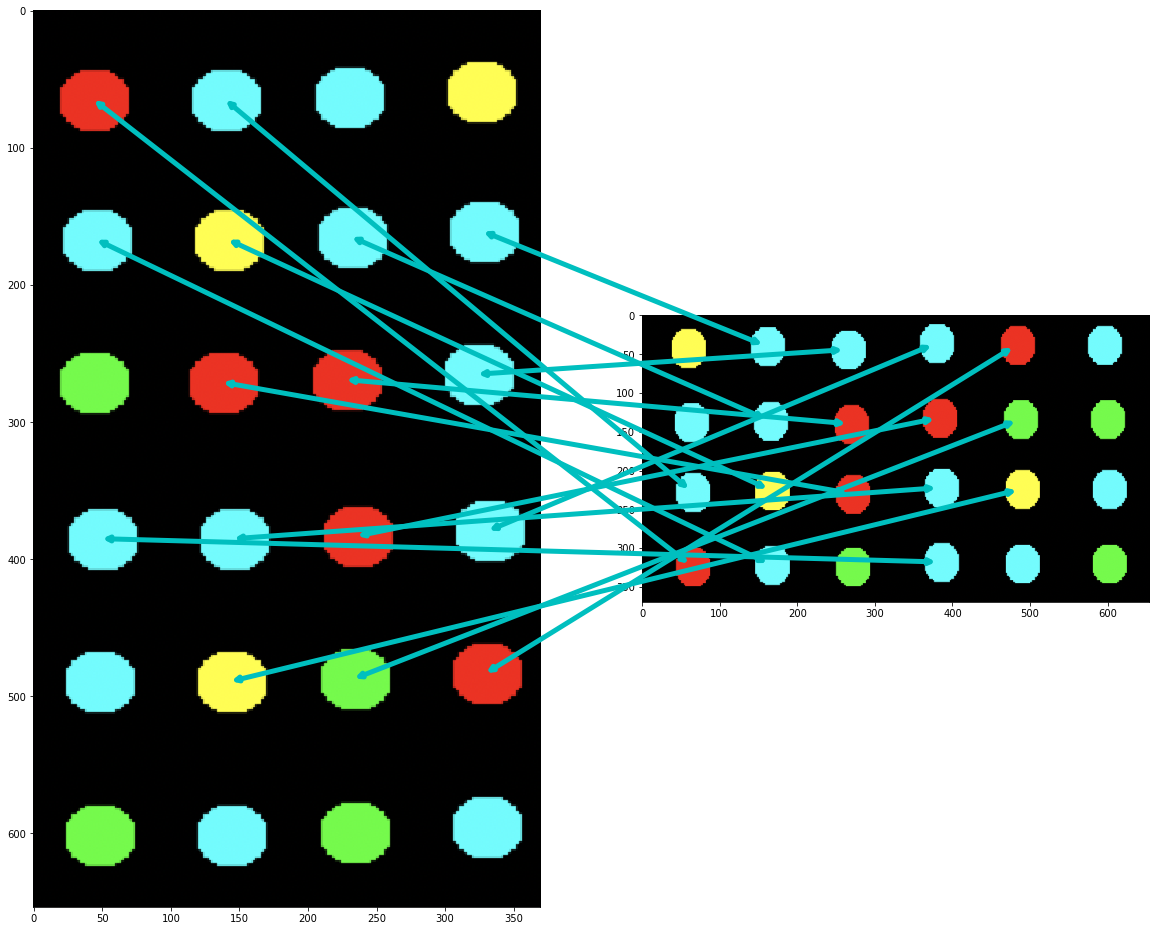

In [31]:
match_points(img_path_3,img_path_4)

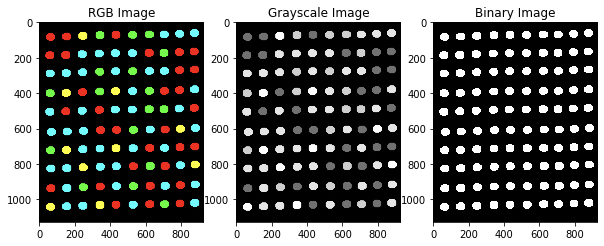

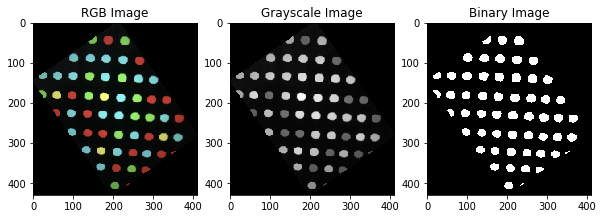

No. of same 3x3 patterns detected:  22
Pattern:  302323232
Found at  (175, 428)  in image 1
Found at  (90, 181)  in image 2
Pattern:  313233322
Found at  (277, 430)  in image 1
Found at  (135, 179)  in image 2
Pattern:  203331323
Found at  (277, 526)  in image 1
Found at  (138, 221)  in image 2
Pattern:  202133333
Found at  (279, 340)  in image 1
Found at  (134, 140)  in image 2
Pattern:  203323322
Found at  (387, 620)  in image 1
Found at  (189, 257)  in image 2
Pattern:  103332322
Found at  (389, 430)  in image 1
Found at  (185, 176)  in image 2
Pattern:  313322323
Found at  (389, 526)  in image 1
Found at  (188, 217)  in image 2
Pattern:  203031323
Found at  (391, 340)  in image 1
Found at  (183, 137)  in image 2
Pattern:  002233103
Found at  (395, 244)  in image 1
Found at  (181, 96)  in image 2
Pattern:  202023323
Found at  (491, 618)  in image 1
Found at  (234, 253)  in image 2
Pattern:  200223013
Found at  (491, 702)  in image 1
Found at  (236, 289)  in image 2
Pattern:  3000233

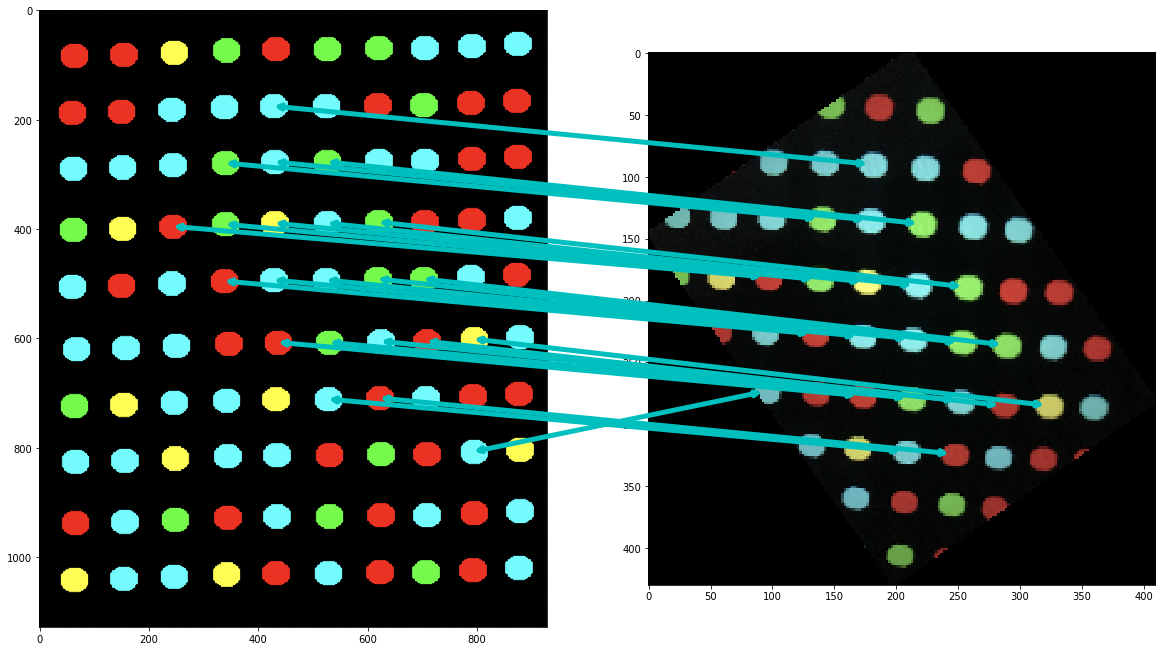

In [32]:
img_path_5 = '/Users/hassaanmuzammil/Desktop/GBMC/rot.png'
match_points(img_path_2, img_path_5)

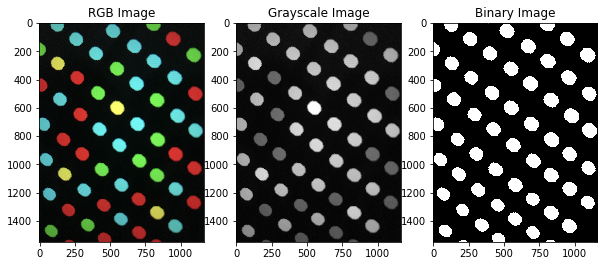

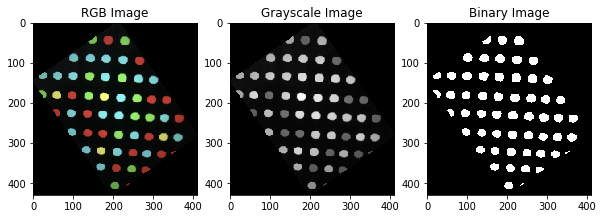

No. of same 3x3 patterns detected:  28
Pattern:  302323232
Found at  (268, 809)  in image 1
Found at  (90, 181)  in image 2
Pattern:  202133333
Found at  (322, 549)  in image 1
Found at  (134, 140)  in image 2
Pattern:  302033323
Found at  (385, 955)  in image 1
Found at  (93, 223)  in image 2
Pattern:  002233103
Found at  (385, 269)  in image 1
Found at  (181, 96)  in image 2
Pattern:  313233322
Found at  (427, 686)  in image 1
Found at  (135, 179)  in image 2
Pattern:  203031323
Found at  (493, 415)  in image 1
Found at  (183, 137)  in image 2
Pattern:  203331323
Found at  (544, 831)  in image 1
Found at  (138, 221)  in image 2
Pattern:  103332322
Found at  (599, 550)  in image 1
Found at  (185, 176)  in image 2
Pattern:  000312033
Found at  (646, 291)  in image 1
Found at  (227, 134)  in image 2
Pattern:  303033232
Found at  (656, 976)  in image 1
Found at  (140, 262)  in image 2
Pattern:  313322323
Found at  (713, 692)  in image 1
Found at  (188, 217)  in image 2
Pattern:  30002331

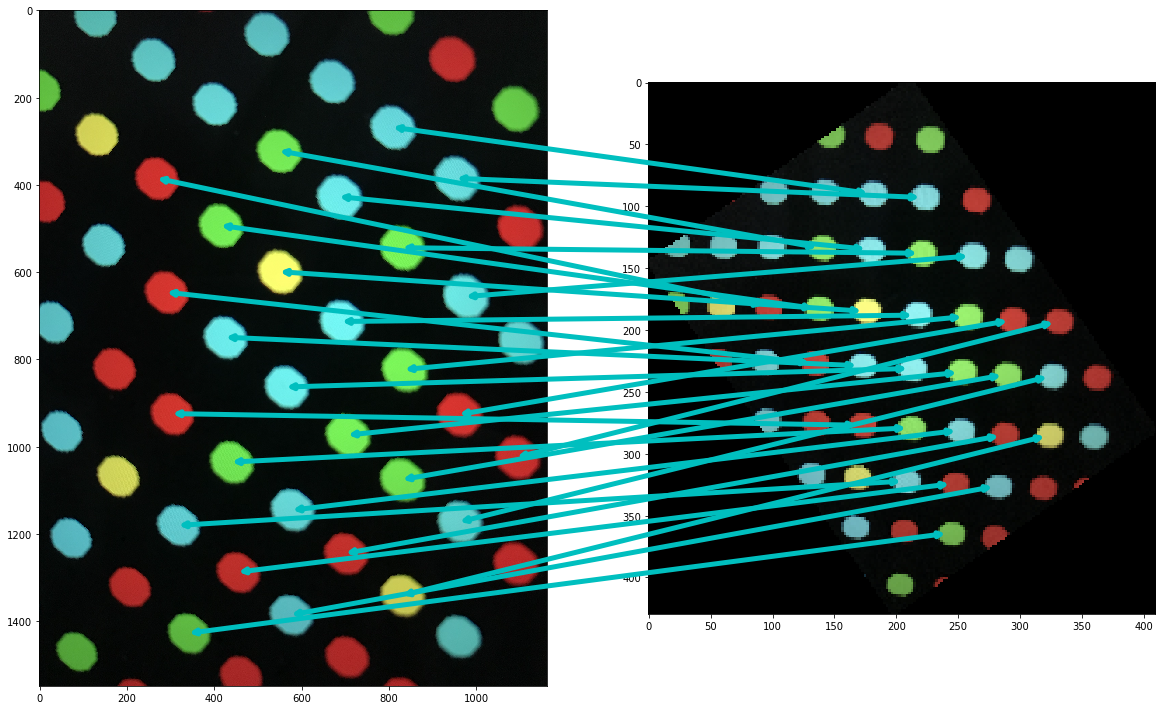

In [33]:
match_points(img_path_1,img_path_5)